In [1]:
import datetime as dt  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set()
%matplotlib inline

In [2]:
# Load the data
calls = pd.read_csv('../data/callsforservicefiltered.csv', header=0, low_memory=True, 
                    memory_map=True)
print(len(calls))
#calls.dtypes

C:\Users\ltran\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1124451


# 1. Clean Up

In [3]:
# Filter out rows where cancelled calls field = True, report only field = True.

calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
print(len(calls))

1101654


In [4]:
# Filter out rows where nature = Transport to Animal Shelter.

calls = calls[calls.nature != 'TRANSPORT TO ANIMAL SHELTER']
print(len(calls))

1083514


In [5]:
# Filter out "Traffic Stop" because the response time is relevant since it does not get call from dispather
calls = calls[calls.nature != 'TRAFFIC STOP']
print(len(calls))

969028


In [6]:
# Filter out "911 UNKNOWN" calls since this could not be classified
calls = calls[calls.nature != '911 UNKNOWN']
print(len(calls))

965217


In [7]:
#Remove unnessessary columns
calls.drop(columns = ['statbeat','ra'], inplace=True)
calls

,calltime,callsource,city,nature,nature2,priority,rptonly,service,agency,district,...,secs2ar,secs2tr,secs2lc,secsdi2en,secsdi2ar,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp
1,2012-07-01T00:09:07Z,E911,G,HEMORRHAGE / LACERATIONS,NaN,4,False,EMS,EMS,B6,...,571,2059,3025,48,393,1881,2454,43,965,M261
3,2012-07-01T00:15:56Z,E911,W,SEIZURES-CONVULSIONS,NaN,1,False,EMS,EMS,B5,...,915,1519,5437,45,854,1457,4522,30,3918,M2
4,2012-07-01T00:17:20Z,E911,W,SEIZURES-CONVULSIONS,NaN,P,False,FIRE,GCF,ALAM,...,685,0,1586,279,677,0,900,8,0,E44
5,2012-07-01T00:19:24Z,E911,G,FALLS-BACK INJURIES(TRAUMATIC),NaN,3,False,EMS,EMS,B4B,...,0,0,339,23,0,0,0,10,0,M241
6,2012-07-01T00:24:42Z,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B1,...,306,1335,2602,22,224,1253,2295,29,1267,M211
8,2012-07-01T00:30:03Z,W911,H,CHEST PAIN,NaN,1,False,EMS,EMS,B2,...,340,1107,2430,47,277,1043,2090,17,1323,M221
9,2012-07-01T00:33:11Z,PHONE,SU,DOMESTIC DISPUTE,NaN,1,False,LAW,GCSD,SD1,...,1148,0,2257,105,290,0,1109,102,0,S314
10,2012-07-01T00:37:41Z,SELF,G,LEGAL PAPER / COMPLAINT,NaN,2,False,LAW,GCSD,GPD1,...,0,0,3734,0,0,0,3734,0,0,S324
11,2012-07-01T00:46:35Z,E911,G,BREATHING PROBLEMS,NaN,1,False,EMS,EMS,B6,...,689,0,1200,26,604,0,511,56,0,MA32
12,2012-07-01T00:47:14Z,E911,G,SICK PERSON,NaN,4,False,EMS,EMS,B6,...,323,753,2339,21,210,640,2015,37,1585,MA32


In [8]:
calls['actualnature'] = [x['nature2'] if x['nature'] is np.nan and x['nature']!=x['nature2']
                        else x['nature'] for i,x in calls.iterrows()]
calls = calls.drop(columns = ['nature','nature2'])
calls = calls.rename(columns={'actualnature' : 'nature'})

In [9]:
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,1881,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,1457,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0
4,E911,W,P,False,FIRE,GCF,ALAM,44C,E44,False,...,0,900,8,0,E44,SEIZURES-CONVULSIONS,2012,7,1,0
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,1253,2295,29,1267,M211,SICK PERSON,2012,7,1,0
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,1043,2090,17,1323,M221,CHEST PAIN,2012,7,1,0
9,PHONE,SU,1,False,LAW,GCSD,SD1,SD12,S314,False,...,0,1109,102,0,S314,DOMESTIC DISPUTE,2012,7,1,0
10,SELF,G,2,False,LAW,GCSD,GPD1,P110,S324,False,...,0,3734,0,0,S324,LEGAL PAPER / COMPLAINT,2012,7,1,0
11,E911,G,1,False,EMS,EMS,B6,620,M231,False,...,0,511,56,0,MA32,BREATHING PROBLEMS,2012,7,1,0
12,E911,G,4,False,EMS,EMS,B6,602,MA32,False,...,640,2015,37,1585,MA32,SICK PERSON,2012,7,1,0


In [11]:
# split the data up by agency
ems_calls = calls[calls.agency == 'EMS']
aco_calls = calls[calls.agency == 'ACO']
gcsd_calls = calls[calls.agency == 'GCSD']
gcf_calls = calls[calls.agency == 'GCF']

In [12]:
ems_calls

,callsource,city,priority,rptonly,service,agency,district,gp,primeunit,cancelled,...,secsar2tr,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,nature,year,month,dayOfMonth,hour
1,E911,G,4,False,EMS,EMS,B6,627,M261,False,...,1881,2454,43,965,M261,HEMORRHAGE / LACERATIONS,2012,7,1,0
3,E911,W,1,False,EMS,EMS,B5,513,M2,False,...,1457,4522,30,3918,M2,SEIZURES-CONVULSIONS,2012,7,1,0
5,E911,G,3,False,EMS,EMS,B4B,406,M241,False,...,0,0,10,0,M241,FALLS-BACK INJURIES(TRAUMATIC),2012,7,1,0
6,E911,G,4,False,EMS,EMS,B1,119,M211,False,...,1253,2295,29,1267,M211,SICK PERSON,2012,7,1,0
8,W911,H,1,False,EMS,EMS,B2,202,M221,False,...,1043,2090,17,1323,M221,CHEST PAIN,2012,7,1,0
11,E911,G,1,False,EMS,EMS,B6,620,M231,False,...,0,511,56,0,MA32,BREATHING PROBLEMS,2012,7,1,0
12,E911,G,4,False,EMS,EMS,B6,602,MA32,False,...,640,2015,37,1585,MA32,SICK PERSON,2012,7,1,0
19,E911,G,1,False,EMS,EMS,B3A,301,M251,False,...,1792,3943,9,2624,M251,HEART PROBLEMS,2012,7,1,1
20,PHONE,G,5,False,EMS,EMS,B4A,401,MA32,False,...,1279,3141,605,1862,MA32,CONVALESCENT TRANSPORT,2012,7,1,1
22,E911,G,3,False,EMS,EMS,B1,108,M211,False,...,1209,1691,21,1128,M211,ASSAULT / RAPE,2012,7,1,1


# EMS 

In [13]:
ems_groupby_nature_size = ems_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
ems_groupby_nature_size
#ems_groupby_nature_size


,nature,second
0,SICK PERSON,64109
1,FALLS-BACK INJURIES(TRAUMATIC),54876
2,BREATHING PROBLEMS,40025
3,CONVALESCENT TRANSPORT,31732
4,CHEST PAIN,30974
5,UNCONSCIOUS-FAINTING,28620
6,ACCIDENT WITH PERSONAL INJURY,25774
7,EMS RESPONSE - NON EMERGENCY,21177
8,SEIZURES-CONVULSIONS,15845
9,TRANSFER INTERFACILITY,15239


In [14]:
ems_groupby_nature_mean = ems_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
ems_groupby_nature_mean

,nature,second_avg
0,HAZMAT,274.000000
1,EMS TACTICAL CALL,218.853211
2,ACCIDENT PI W/TRACTOR TRAILER,107.000000
3,HOSPICE TRANSPORT,79.956897
4,DEAD BODY TRANSPORT-PTAR ONLY,50.050462
5,TRANSPORT ONLY- MED FACILITY,49.150039
6,AIR ALERT 3 SMALL AIRCRAFT,46.666667
7,ASSIST PATIENT,39.026596
8,DISORDERLY SUBJECT OR CROWD,39.000000
9,AIR ALERT 1 SMALL AIRCRAFT,36.773585


In [15]:
ems_merged = pd.merge(ems_groupby_nature_size,ems_groupby_nature_mean,on='nature')
ems_merged

,nature,second,second_avg
0,SICK PERSON,64109,31.463726
1,FALLS-BACK INJURIES(TRAUMATIC),54876,30.346672
2,BREATHING PROBLEMS,40025,29.235403
3,CONVALESCENT TRANSPORT,31732,35.594258
4,CHEST PAIN,30974,29.116969
5,UNCONSCIOUS-FAINTING,28620,29.031342
6,ACCIDENT WITH PERSONAL INJURY,25774,28.231823
7,EMS RESPONSE - NON EMERGENCY,21177,32.660811
8,SEIZURES-CONVULSIONS,15845,28.814516
9,TRANSFER INTERFACILITY,15239,31.984645


In [16]:
ems_merged["second"].describe()


count       91.000000
mean      5229.659341
std      11453.974392
min          1.000000
25%          4.000000
50%        206.000000
75%       4038.500000
max      64109.000000
Name: second, dtype: float64

## EMS - Find Outlier

In [17]:
# IQR
iqr_ems = ems_merged["second"].quantile(0.75) - ems_merged["second"].quantile(0.25)
iqr_ems



4034.5

In [18]:
# median
median_size_ems = ems_merged["second"].quantile(0.50)
median_size_ems


206.0

In [19]:
# lower outlier bound
lower_outlier_bound_ems = ems_merged["second"].quantile(0.25) - 1.5 * iqr_ems
lower_outlier_bound_ems

-6047.75

In [20]:
# upper outlier bound
upper_outlier_boud_ems = ems_merged["second"].quantile(0.75) +  1.5 * iqr_ems
upper_outlier_boud_ems


10090.25

In [21]:
# new data range after outlier has been removed
ems_outlier_removed = ems_merged[(ems_merged['second'] > lower_outlier_bound_ems) & (ems_merged['second'] < upper_outlier_boud_ems) ]
ems_outlier_removed


,nature,second,second_avg
15,STROKE (CVA),9287,28.920103
16,OVERDOSE-INGESTION-POISONING,8316,30.216450
17,TRAUMATIC INJURIES - SPECIFIC,6514,29.690973
18,HEART PROBLEMS,5824,29.494677
19,ASSAULT / RAPE,5385,30.992201
20,EMS ASSISTANCE NEEDED,5377,33.505300
21,CARDIAC / RESPIRATORY ARREST,5248,28.243902
22,ALLERGIES-HIVES-STINGS,4166,30.002400
23,BACK PAIN (NON-TRAUMATIC),3911,31.434160
24,PREGNANCY-CHILDBIRTH-MISCARRY,3686,29.780250


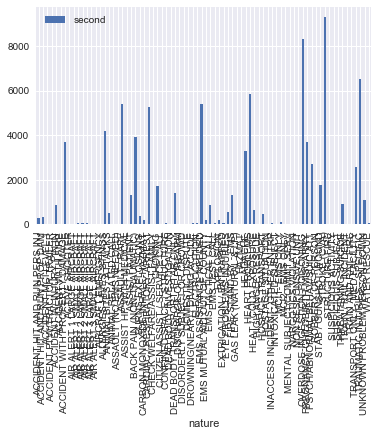

Text(0,0.5,'second')

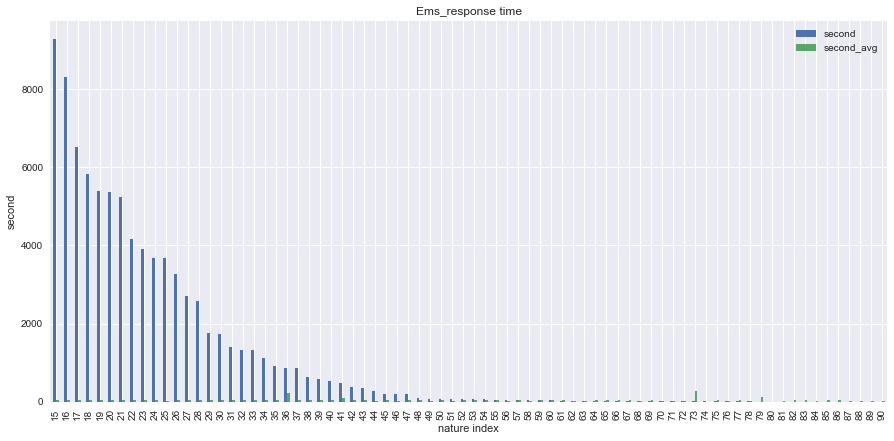

In [72]:

#plt.xticks( site2['Cl'], site2.index.values ) # location, labels
#plt.plot( site2['Cl'] )
#plt.show()



ems_plot = ems_outlier_removed.plot(kind='bar', title = "Ems_response time", figsize=(15,7))
ems_plot.set_xlabel("nature index")
ems_plot.set_ylabel("second")


In [23]:
ems_outlier_removed['second'].corr(ems_outlier_removed['second'])

1.0

# ACO

In [24]:
aco_groupby_nature_size = aco_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
aco_groupby_nature_size

,nature,second
0,ZRUNNING AT LARGE,13207
1,ZALLOWED TO RUN AT LARGE,8268
2,ZCONFINED,7813
3,ZCHECK WELFARE,6680
4,ZFOLLOW UP,5115
5,ZINJURED ANIMAL,4725
6,ZVICIOUS ANIMAL,4530
7,ZANIMAL BITE,4065
8,ZSURRENDER ANIMAL,3708
9,ZOWNER TRAP,3123


In [25]:
aco_groupby_nature_mean = aco_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
aco_groupby_nature_mean

,nature,second_avg
0,ZDANGEROUS / VICIOUS CALL,110.931034
1,ZCRUELTY,26.918919
2,ZANIMAL ATTACK,24.699535
3,ZABANDONED ANIMAL,22.378657
4,ZWELFARE CHECK FOLLOW UP,13.664710
5,ZPICK UP TRAP,10.347150
6,ZMISTREATMENT,8.680000
7,ZASSIST,8.508872
8,ZINJURED ANIMAL,8.266455
9,ZSET A TRAP,7.663564


In [26]:
# mergering 
aco_merged = pd.merge(aco_groupby_nature_size,aco_groupby_nature_mean,on='nature')
aco_merged

,nature,second,second_avg
0,ZRUNNING AT LARGE,13207,2.504354
1,ZALLOWED TO RUN AT LARGE,8268,5.932027
2,ZCONFINED,7813,1.385511
3,ZCHECK WELFARE,6680,2.279790
4,ZFOLLOW UP,5115,5.252981
5,ZINJURED ANIMAL,4725,8.266455
6,ZVICIOUS ANIMAL,4530,3.798013
7,ZANIMAL BITE,4065,7.004674
8,ZSURRENDER ANIMAL,3708,2.913970
9,ZOWNER TRAP,3123,0.019853


In [27]:
aco_merged["second"].describe()

count       48.000000
mean      1653.583333
std       2719.360335
min          1.000000
25%         52.250000
50%        543.500000
75%       1440.000000
max      13207.000000
Name: second, dtype: float64

## ACO - Find Outlier

In [28]:
# IQR
iqr_aco = aco_merged["second"].quantile(0.75) - aco_merged["second"].quantile(0.25)
iqr_aco

1387.75

In [29]:
# median
median_size_aco = aco_merged["second"].quantile(0.50)
median_size_aco

543.5

In [40]:
# upper outlier bound
upper_outlier_bound_aco = ems_merged["second"].quantile(0.75) +  1.5 * iqr_aco
upper_outlier_bound_aco

6120.125

In [41]:
# lower outlier bound
lower_outlier_bound_aco = aco_merged["second"].quantile(0.25) - 1.5 * iqr_aco
lower_outlier_bound_aco

-2029.375

In [42]:
# new data range after outlier has been removed
aco_outlier_removed = aco_merged[(aco_merged['second'] > lower_outlier_bound_aco) & (aco_merged['second'] < upper_outlier_bound_aco) ]
aco_outlier_removed

,nature,second,second_avg
4,ZFOLLOW UP,5115,5.252981
5,ZINJURED ANIMAL,4725,8.266455
6,ZVICIOUS ANIMAL,4530,3.798013
7,ZANIMAL BITE,4065,7.004674
8,ZSURRENDER ANIMAL,3708,2.913970
9,ZOWNER TRAP,3123,0.019853
10,ZSICK ANIMAL,2496,4.199119
11,ZWELFARE CHECK FOLLOW UP,1533,13.664710
12,ZASSIST,1409,8.508872
13,ZTRAP,1243,3.701529


## ACO graph

Text(0,0.5,'second')

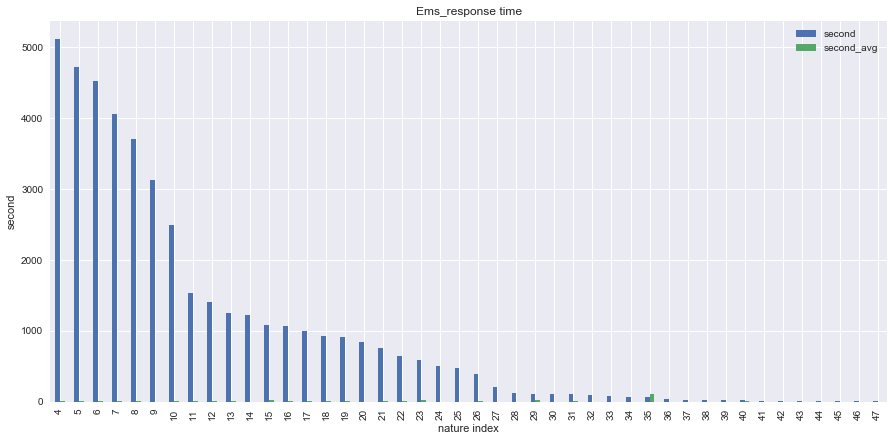

In [43]:
aco_plot = aco_outlier_removed.plot(kind='bar', title = "Ems_response time", figsize=(15,7))
aco_plot.set_xlabel("nature index")
aco_plot.set_ylabel("second")

# gcsd

In [44]:
gcsd_groupby_nature_size = gcsd_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
gcsd_groupby_nature_size

,nature,second
0,BURGLAR ALARM,33346
1,LEGAL PAPER / COMPLAINT,18306
2,C22-WARRANT-GCSD ONLY,17479
3,SUSPICIOUS ACTIVITY,17416
4,SUSPICIOUS VEHICLE,16751
5,C1-FOLLOW UP,15509
6,C21-PADLOCK-GCSD ONLY,13911
7,LAW ASSISTANCE NEEDED,11103
8,C6-EQUIP/VEHICLE,9787
9,C10-MEAL,9371


In [45]:
gcsd_groupby_nature_mean = gcsd_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
gcsd_groupby_nature_mean

,nature,second_avg
0,GUARD DUTY / GUARD A PRISONER,1832.096552
1,C16-GUARD DUTY,566.587156
2,PRISONER TRANSPORT,476.813953
3,MISUSE OF 911,341.368421
4,ARSON INVESTIGATION,264.636364
5,VICE,232.152027
6,EMS RESPONSE - EMERGENCY,155.666667
7,RAPE / SEXUAL ASSAULT - NO EMS,109.790123
8,C14-TRAINING,87.230831
9,MENTAL SUBJECT/COMMIT SERV,79.707018


In [46]:
# mergering 
gcsd_merged = pd.merge(aco_groupby_nature_size,aco_groupby_nature_mean,on='nature')
gcsd_merged

,nature,second,second_avg
0,ZRUNNING AT LARGE,13207,2.504354
1,ZALLOWED TO RUN AT LARGE,8268,5.932027
2,ZCONFINED,7813,1.385511
3,ZCHECK WELFARE,6680,2.279790
4,ZFOLLOW UP,5115,5.252981
5,ZINJURED ANIMAL,4725,8.266455
6,ZVICIOUS ANIMAL,4530,3.798013
7,ZANIMAL BITE,4065,7.004674
8,ZSURRENDER ANIMAL,3708,2.913970
9,ZOWNER TRAP,3123,0.019853


In [47]:
gcsd_merged["second"].describe()

count       48.000000
mean      1653.583333
std       2719.360335
min          1.000000
25%         52.250000
50%        543.500000
75%       1440.000000
max      13207.000000
Name: second, dtype: float64

# GCSD - outlier

In [48]:
# IQR
iqr_gcsd = gcsd_merged["second"].quantile(0.75) - gcsd_merged["second"].quantile(0.25)
iqr_gcsd

1387.75

In [49]:
# median
median_size_gcsd = gcsd_merged["second"].quantile(0.50)
median_size_gcsd

543.5

In [50]:
# lower outlier bound
lower_outlier_bound_gcsd = gcsd_merged["second"].quantile(0.25) - 1.5 * iqr_gcsd
lower_outlier_bound_gcsd

-2029.375

In [51]:
# upper outlier bound
upper_outlier_boud_gcsd = gcsd_merged["second"].quantile(0.75) +  1.5 * iqr_gcsd
upper_outlier_boud_gcsd

3521.625

In [52]:
# new data range after outlier has been removed
gcsd_outlier_removed = gcsd_merged[(gcsd_merged['second'] > lower_outlier_bound_gcsd) & (gcsd_merged['second'] < upper_outlier_boud_gcsd) ]
gcsd_outlier_removed

,nature,second,second_avg
9,ZOWNER TRAP,3123,0.019853
10,ZSICK ANIMAL,2496,4.199119
11,ZWELFARE CHECK FOLLOW UP,1533,13.664710
12,ZASSIST,1409,8.508872
13,ZTRAP,1243,3.701529
14,ZPUBLIC NUISANCE,1219,0.635767
15,ZANIMAL ATTACK,1075,24.699535
16,MISCELLANEOUS,1068,2.548689
17,ZTETHERING CALL,999,4.937938
18,ZBAT/RACCOON IN RESIDENCE,919,5.825898


### GCSD - graph

Text(0,0.5,'second')

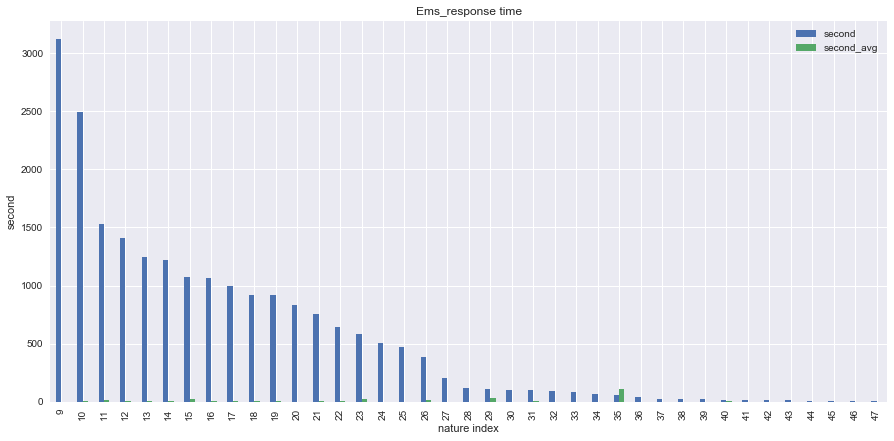

In [53]:
gcsd_plot = gcsd_outlier_removed.plot(kind='bar', title = "Ems_response time", figsize=(15,7))
gcsd_plot.set_xlabel("nature index")
gcsd_plot.set_ylabel("second")

# GFD - Guilford County Fire Department

In [54]:
gcf_groupby_nature_size = gcf_calls.groupby('nature')['secsdi2en'].size().sort_values(ascending=False).reset_index(name='second')
gcf_groupby_nature_size


,nature,second
0,FALLS-BACK INJURIES(TRAUMATIC),6705
1,ACCIDENT WITH PERSONAL INJURY,6690
2,BREATHING PROBLEMS,6523
3,ALARMS,6113
4,CITIZEN ASSIST / SERVICE CALL,5831
5,CHEST PAIN,5044
6,SICK PERSON,4906
7,UNCONSCIOUS-FAINTING,4868
8,OUTSIDE FIRE,2912
9,FIRE ONLY - MEDICAL ASSISTANCE,2477


In [55]:
gcf_groupby_nature_mean = gcf_calls.groupby('nature')['secsdi2en'].mean().sort_values(ascending=False).reset_index(name='second_avg')
gcf_groupby_nature_mean

,nature,second_avg
0,HAZMAT,105.636364
1,ATV,103.520000
2,FALLS-BACK INJURIES(TRAUMATIC),99.173154
3,CARBON-MONOXIDE-INHALE-HAZMAT,92.037037
4,ACCIDENT PI W/TRACTOR TRAILER,91.000000
5,AIRCRAFT EMERGENCY,82.333333
6,ASSAULT / RAPE,81.964401
7,PSYCH/ABNORMAL BEHAV/SUIC ATT,81.346386
8,ELECTRICAL HAZARD,80.553166
9,BACK PAIN (NON-TRAUMATIC),80.243750


In [56]:
# mergering 
gcf_merged = pd.merge(gcf_groupby_nature_size,gcf_groupby_nature_mean,on='nature')
gcf_merged

,nature,second,second_avg
0,FALLS-BACK INJURIES(TRAUMATIC),6705,99.173154
1,ACCIDENT WITH PERSONAL INJURY,6690,71.449776
2,BREATHING PROBLEMS,6523,79.267975
3,ALARMS,6113,71.647800
4,CITIZEN ASSIST / SERVICE CALL,5831,43.179386
5,CHEST PAIN,5044,75.614988
6,SICK PERSON,4906,73.739706
7,UNCONSCIOUS-FAINTING,4868,74.470008
8,OUTSIDE FIRE,2912,74.463255
9,FIRE ONLY - MEDICAL ASSISTANCE,2477,53.895034


In [57]:
gcf_merged["second"].describe()

count      85.000000
mean      955.670588
std      1746.353053
min         1.000000
25%        13.000000
50%       113.000000
75%      1077.000000
max      6705.000000
Name: second, dtype: float64

# GFD - outlier

In [58]:
# IQR
iqr_gcf = gcf_merged["second"].quantile(0.75) - gcf_merged["second"].quantile(0.25)
iqr_gcf

1064.0

In [59]:
# median
median_size_gcf = gcf_merged["second"].quantile(0.50)
median_size_gcf

113.0

In [60]:
# lower outlier bound
lower_outlier_bound_gcf = gcf_merged["second"].quantile(0.25) - 1.5 * iqr_gcf
lower_outlier_bound_gcf

-1583.0

In [61]:
# upper outlier bound
upper_outlier_boud_gcf = gcf_merged["second"].quantile(0.75) +  1.5 * iqr_gcf
upper_outlier_boud_gcf

2673.0

In [62]:
# new data range after outlier has been removed
gcf_outlier_removed = gcf_merged[(gcf_merged['second'] > lower_outlier_bound_gcf) & (gcf_merged['second'] < upper_outlier_boud_gcf) ]
gcf_outlier_removed

,nature,second,second_avg
9,FIRE ONLY - MEDICAL ASSISTANCE,2477,53.895034
10,MUTUAL AID,2414,73.311102
11,FIRE ASSISTANCE NEEDED,2325,58.655914
12,STROKE (CVA),2171,72.970060
13,UNKNOWN PROBLEM MAN DOWN,1948,73.535934
14,STRUCTURE FIRE,1938,72.728070
15,SEIZURES-CONVULSIONS,1873,73.693540
16,HEMORRHAGE / LACERATIONS,1818,77.405391
17,EMS RESPONSE - EMERGENCY,1397,56.644953
18,DIABETIC PROBLEMS,1379,79.308920


# GFD - graph

Text(0,0.5,'second')

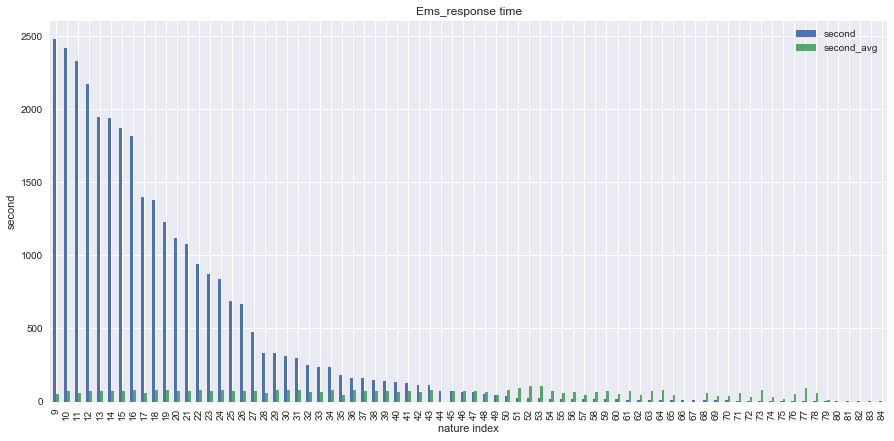

In [63]:
gcf_plot = gcf_outlier_removed.plot(kind='bar', title = "Ems_response time", figsize=(15,7))
gcf_plot.set_xlabel("nature index")
gcf_plot.set_ylabel("second")

# Progress report -3

# Data Anayltics Nature Vs. Response time!
## Goals:
### 1) Basic statistics and clean data some more for our purposes
### 2) Check the Distribution of the of response time and see patterns
### 3) Check Relationships of response time changing from month to month